In [1]:
## import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
## load data

path = 'data/df_adjt_start.csv'
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,...,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,SalaryCategory
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0.00,...,KHL,1.00,02 - PARTICULARES,ES,Malaga,H,35,N,"87,218.10",med_income
2018-01-28,1050611,0,0,0,0,0,0,0,0,0.00,...,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"35,548.74",low_income
2018-01-28,1050612,0,0,0,0,0,0,0,0,0.00,...,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"122,179.11",upper_income
2018-01-28,1050613,1,0,0,0,0,0,0,0,0.00,...,KHD,0.00,03 - UNIVERSITARIO,ES,Zaragoza,H,22,N,"119,775.54",med_income
2018-01-28,1050614,0,0,0,0,0,0,0,0,0.00,...,KHE,1.00,03 - UNIVERSITARIO,ES,Zaragoza,V,23,N,"117,340.99",med_income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 2018-01-28 to 2019-05-28
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   short_term_deposit  int64  
 2   loans               int64  
 3   mortgage            int64  
 4   funds               int64  
 5   securities          int64  
 6   long_term_deposit   int64  
 7   credit_card         int64  
 8   debit_card          int64  
 9   payroll             float64
 10  pension_plan        float64
 11  payroll_account     int64  
 12  emc_account         int64  
 13  em_account_p        int64  
 14  em_acount           int64  
 15  year_x              int64  
 16  month_x             int64  
 17  year_month_x        object 
 18  Total_products      int64  
 19  Total_accounts      int64  
 20  entry_date          object 
 21  entry_channel       object 
 22  active_customer     float64
 23  segment             object 
 24  country_id       

In [6]:
products = df.columns[1:15]
products

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'debit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'em_account_p',
       'em_acount'],
      dtype='object')

In [7]:
df.drop(['year_x','month_x','year_month_x','Total_products','Total_accounts','SalaryCategory'], axis = 1, inplace=True)

In [8]:
df.index.unique()

Index(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28', '2018-05-28',
       '2018-06-28', '2018-07-28', '2018-08-28', '2018-09-28', '2018-10-28',
       '2018-11-28', '2018-12-28', '2019-01-28', '2019-02-28', '2019-03-28',
       '2019-04-28', '2019-05-28'],
      dtype='object', name='pk_partition')

In [9]:
df_last_month = df.copy()
partitions = df.index.unique()

for partition in partitions[:-1]:
    df_last_month.drop(partition,inplace=True)
    

In [10]:
df_nxt2last_month = df.copy()

for partition in partitions[:-2]:
    df_nxt2last_month.drop(partition,inplace=True)
df_nxt2last_month.drop(partitions[-1],inplace=True)    

In [11]:
print(df_last_month.index.unique())
print(df_nxt2last_month.index.unique())

Index(['2019-05-28'], dtype='object', name='pk_partition')
Index(['2019-04-28'], dtype='object', name='pk_partition')


## CLUSTERS

In [12]:
## AGE and PRODUCTS

df_last_month['age'].describe()

count   442,995.00
mean         30.40
std          12.24
min           2.00
25%          22.00
50%          25.00
75%          35.00
max         105.00
Name: age, dtype: float64

In [13]:
df_products_ages = pd.DataFrame(index=['u18','18-30','31-40','41-50','51-60','61-70','71-80','o80'], columns=products)

In [14]:
for prod in products:    
    df_products_ages.loc['u18',prod] = df[df['age']<18][prod].sum()
    df_products_ages.loc['18-30',prod] = df[(df['age']>18)&(df['age']<30)][prod].sum()
    df_products_ages.loc['31-40',prod] = df[(df['age']>30)&(df['age']<40)][prod].sum()
    df_products_ages.loc['41-50',prod] = df[(df['age']>40)&(df['age']<50)][prod].sum()
    df_products_ages.loc['51-60',prod] = df[(df['age']>50)&(df['age']<60)][prod].sum()
    df_products_ages.loc['61-70',prod] = df[(df['age']>60)&(df['age']<70)][prod].sum()
    df_products_ages.loc['71-80',prod] = df[(df['age']>70)&(df['age']<80)][prod].sum()
    df_products_ages.loc['o80',prod] = df[df['age']>80][prod].sum()

In [15]:
df_products_ages = df_products_ages.T
df_products_ages

,u18,18-30,31-40,41-50,51-60,61-70,71-80,o80
short_term_deposit,0,829,4243,4116,2205,1406,731,379
loans,0,217,139,46,41,0,0,0
mortgage,0,13,111,70,94,0,0,0
funds,0,1705,3947,4360,4372,2149,814,805
securities,0,2426,5674,5655,3515,1579,746,456
long_term_deposit,0,4097,16782,24475,19525,12468,7761,6292
credit_card,0,7141,23912,18805,9470,3258,927,222
debit_card,0,148211,197534,100593,42144,14948,4127,2940
payroll,8.00,"53,188.00","75,154.00","36,690.00","15,770.00","3,555.00",297.00,110.00
pension_plan,187.00,"55,257.00","76,087.00","37,999.00","16,715.00","6,098.00","1,806.00","1,699.00"


In [16]:
## MOST POPULAR PRODUCTS IN SPAIN

df_spain = df[df['country_id']=='ES']

In [17]:
df_spain[products].sum()

short_term_deposit      15,390.00
loans                      468.00
mortgage                   324.00
funds                   20,065.00
securities              22,039.00
long_term_deposit      100,455.00
credit_card             70,747.00
debit_card             562,641.00
payroll                205,770.00
pension_plan           217,781.00
payroll_account        329,387.00
emc_account            326,542.00
em_account_p                34.00
em_acount            4,379,978.00
dtype: float64

In [18]:
## Regions and products

df_products_region = pd.DataFrame(index=df['region_code'].unique(), columns=products)

In [19]:
for region in df['region_code'].unique():
    for prod in products:
        df_products_region.loc[region,prod] = df[df['region_code']==region][prod].sum()    

In [20]:
df_products_region

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
Malaga,403,24,0,219,359,1511,1955,19612,"5,978.00","6,377.00",10185,8030,0,148179
Ciudad Real,150,0,0,249,166,731,450,5093,"1,213.00","1,317.00",2105,2557,0,58074
Zaragoza,393,0,17,449,606,1660,1205,8063,"3,055.00","3,196.00",5134,5422,0,110031
Toledo,153,8,0,187,283,978,1045,8712,"3,265.00","3,417.00",5142,3750,0,77714
Leon,135,0,0,252,270,715,501,4833,"1,481.00","1,584.00",2406,2463,0,26445
Guipuzcoa,186,0,0,184,156,829,511,2553,814.00,828.00,1390,2634,0,12172
Caceres,110,0,0,62,108,515,357,4147,"1,038.00","1,126.00",2024,1830,0,72709
Gerona,82,0,0,68,111,403,520,3019,"1,167.00","1,235.00",1902,1854,0,36494
Zamora,38,0,0,65,119,311,182,2300,519.00,534.00,883,868,0,26477
Barcelona,1342,34,29,1526,1737,7710,6622,39559,"17,854.00","18,561.00",28532,25464,0,405183


In [21]:
## Active customer vs Products

In [22]:
df_last_month.loc[df_last_month['active_customer']==0,products].sum()

short_term_deposit         0.00
loans                      0.00
mortgage                   0.00
funds                      2.00
securities                 4.00
long_term_deposit          0.00
credit_card               22.00
debit_card               194.00
payroll                   32.00
pension_plan              36.00
payroll_account          806.00
emc_account            2,986.00
em_account_p               0.00
em_acount            161,699.00
dtype: float64

In [23]:
df_last_month.loc[df_last_month['active_customer']==1,products].sum()

short_term_deposit         2.00
loans                     30.00
mortgage                  23.00
funds                  1,313.00
securities             1,785.00
long_term_deposit      6,129.00
credit_card            4,779.00
debit_card            43,067.00
payroll               16,301.00
pension_plan          17,317.00
payroll_account       25,723.00
emc_account           21,765.00
em_account_p               2.00
em_acount            134,681.00
dtype: float64

In [24]:
# what does it make a customer non active?? They still have products

In [25]:
## Entry date

df['entry_date'].unique()

array(['2018-01-12', '2015-08-10', '2015-08-16', ..., '2019-05-25',
       '2019-05-01', '2019-05-15'], dtype=object)

In [26]:
# 2015-02-29
# This is completely wrong but it is a quick solution just to have a look
# pandas doesn't seem to ackowledge the existence of lap years with 29th of feb so it gives an error when converting it to datetime
# I will just transform it to 28th feb for this visualization

df.loc[df['entry_date']=='2015-02-29','entry_date'] = '2015-02-28'
df.loc[df['entry_date']=='2019-02-29','entry_date'] = '2019-02-28'

In [27]:
len(df['entry_date'].unique())

1497

In [28]:
df['entry_date'] = pd.to_datetime(df['entry_date'],format='%Y-%m-%d')
df_entry_dates = df.set_index('entry_date')

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

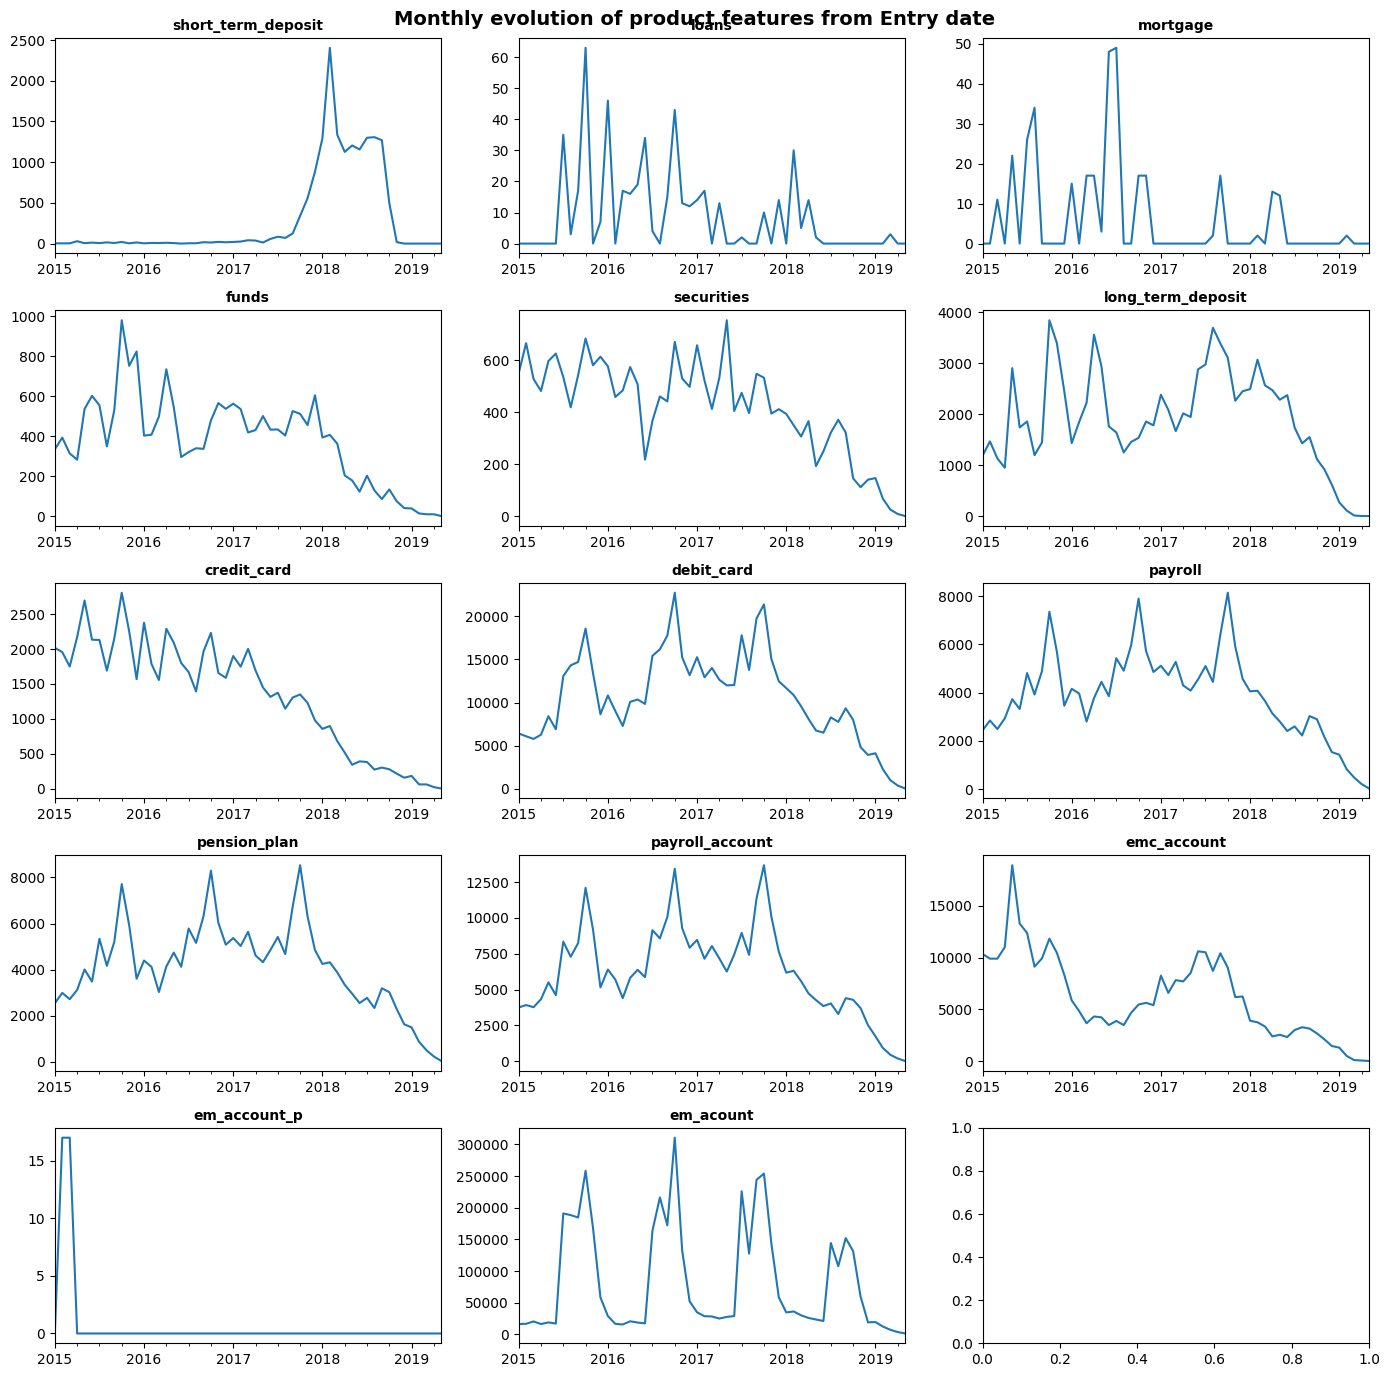

In [29]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    df_entry_dates.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')

In [30]:
# confirmation no duplicates in above plots

# 1. Actual numbers in the plot
df_entry_dates.resample('M')[col].sum()

entry_date
2015-01-31     16375
2015-02-28     16837
2015-03-31     20557
2015-04-30     16436
2015-05-31     19025
2015-06-30     17219
2015-07-31    191095
2015-08-31    188437
2015-09-30    184667
2015-10-31    258399
2015-11-30    168333
2015-12-31     58460
2016-01-31     29059
2016-02-29     16717
2016-03-31     15728
2016-04-30     20769
2016-05-31     18796
2016-06-30     17464
2016-07-31    163852
2016-08-31    216378
2016-09-30    172258
2016-10-31    310691
2016-11-30    132289
2016-12-31     52251
2017-01-31     34942
2017-02-28     28800
2017-03-31     28380
2017-04-30     25106
2017-05-31     27682
2017-06-30     29075
2017-07-31    226092
2017-08-31    127590
2017-09-30    244163
2017-10-31    254013
2017-11-30    143391
2017-12-31     58610
2018-01-31     34792
2018-02-28     36264
2018-03-31     30201
2018-04-30     26042
2018-05-31     23606
2018-06-30     21179
2018-07-31    144363
2018-08-31    107867
2018-09-30    152140
2018-10-31    131516
2018-11-30     59832
20

In [31]:
df_test = df.copy()
df_test.drop_duplicates(subset='pk_cid', inplace=True)

In [32]:
# 2. People which entry date is any day in may and they have em_acount, should match the last number in above series

count = 0
for i in range(len(df_test)):
    if ('2019-05' in str(df_test.iloc[i,15]))&(df_test.iloc[i,14]==1):
        count += 1

count

1511

In [33]:
## confirm that monthly evolution and products selling match
# something is off

In [34]:
products_df = df.iloc[:,:15].copy()

In [35]:
products_df.head()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
pk_partition,,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
2018-01-28,1050611,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
2018-01-28,1050612,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
2018-01-28,1050613,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0
2018-01-28,1050614,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1


In [36]:
products_df.reset_index(inplace=True)

In [37]:
products_df['pk_partition'] = pd.to_datetime(products_df['pk_partition'], format='%Y-%m-%d')
products_df = products_df.set_index('pk_partition')


In [38]:
products = list(products)

Text(0.5, 0.98, 'Monthly evolution of product features')

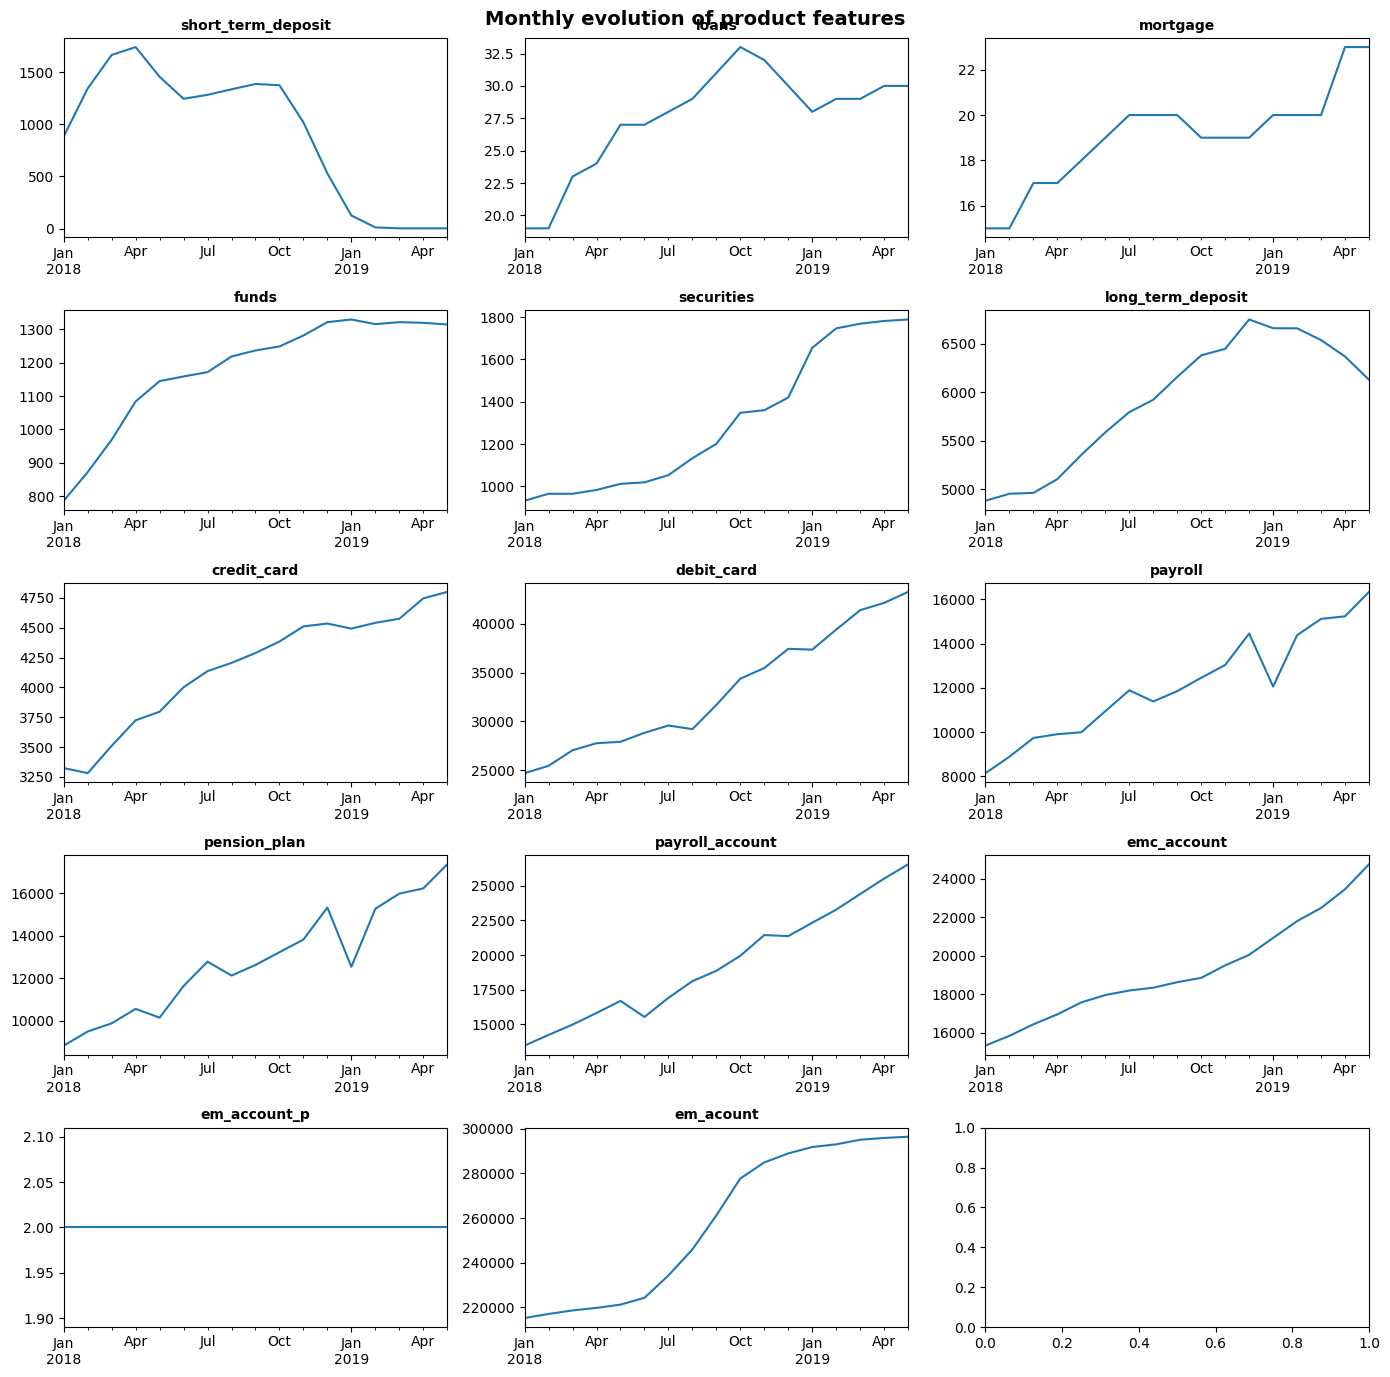

In [39]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    products_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')

In [40]:
products_df.resample('M')['em_account_p'].sum()

pk_partition
2018-01-31    2
2018-02-28    2
2018-03-31    2
2018-04-30    2
2018-05-31    2
2018-06-30    2
2018-07-31    2
2018-08-31    2
2018-09-30    2
2018-10-31    2
2018-11-30    2
2018-12-31    2
2019-01-31    2
2019-02-28    2
2019-03-31    2
2019-04-30    2
2019-05-31    2
Freq: M, Name: em_account_p, dtype: int64

In [41]:
products_df.reset_index(inplace=True)

In [42]:
# partitions happenalways on the 28th of each month

In [43]:
products_df.loc[(products_df['pk_partition']=='2019-05-28')&(products_df['em_account_p']==1)]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
5520169,2019-05-28,645092,0,0,0,0,0,0,0,1,0.00,0.00,1,0,1,0
5524600,2019-05-28,313778,0,0,0,0,1,0,0,0,0.00,0.00,0,0,1,1


In [44]:
df.reset_index(inplace=True)

In [45]:
df.loc[(df['pk_partition']=='2019-05-28')&(df['em_account_p']==1)]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
5520169,2019-05-28,645092,0,0,0,0,0,0,0,1,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,30,N,"74,371.20"
5524600,2019-05-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"


In [46]:
df.loc[df['em_account_p']==1]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
237433,2018-01-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"
238413,2018-01-28,645092,0,0,0,0,0,0,0,0,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,29,N,"74,371.20"
240676,2018-02-28,645092,0,0,0,0,0,0,1,0,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,29,N,"74,371.20"
241691,2018-02-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"
483242,2018-03-28,645092,0,0,0,0,0,0,0,0,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,29,N,"74,371.20"
484274,2018-03-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"
728507,2018-04-28,645092,0,0,0,0,0,0,0,0,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,29,N,"74,371.20"
729533,2018-04-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"
1222291,2018-05-28,313778,0,0,0,0,1,0,0,0,...,2015-03-02,KFA,1.00,01 - TOP,ES,Madrid,H,68,N,"266,063.64"
1223379,2018-05-28,645092,0,0,0,0,0,0,1,0,...,2015-02-07,KFC,1.00,03 - UNIVERSITARIO,ES,Madrid,V,29,N,"74,371.20"


In [47]:
# I have filtered the original df (containing only products) to see which clients have em_account_p, we see that only two of them have 
# (645092 and 313778) and that they keep this type of account  throughout all the partitions

In [48]:
df.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,...,2018-01-12,KHL,1.00,02 - PARTICULARES,ES,Malaga,H,35,N,"87,218.10"
1,2018-01-28,1050611,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"35,548.74"
2,2018-01-28,1050612,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"122,179.11"
3,2018-01-28,1050613,1,0,0,0,0,0,0,0,...,2015-08-10,KHD,0.00,03 - UNIVERSITARIO,ES,Zaragoza,H,22,N,"119,775.54"
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,1.00,03 - UNIVERSITARIO,ES,Zaragoza,V,23,N,"117,340.99"


In [49]:
## Best client

# longest period being active
# number of products
# revenue of those products
#==============================
# VARIABLES

# clients_id: distinct customer ids
# active_id: distinct customer ids active last month
# non_active_id: distinct customer ids non active last month
# active: df with all partitions of customers in active_id
# non_active: df with all partitions of customers in non_active_id
# rank_active_df: rank active customers in terms of revenue

In [50]:
df.reset_index(inplace=True)

In [51]:
# number of distinct customer ids:
clients_id = df['pk_cid'].unique()
len(clients_id)

456373

In [52]:
# divide between active and non-active, based on last month

active = pd.DataFrame()
active_id = list(df.loc[(df['active_customer']==1)&(df['pk_partition']=='2019-05-28'),'pk_cid'])
active_id[:5]

[657826, 657986, 657905, 657336, 658184]

In [53]:
active = df.loc[df['pk_cid'].isin(active_id)]

print(len(active['pk_cid'].unique()))
print(len(active_id))

171568
171568


In [54]:
active = pd.concat([active.iloc[:,:16],active['active_customer']],axis=1)
# only the products

In [55]:
## Now let's rank the customers in terms of the total revenue they gave to the company
rank_active_df = pd.DataFrame(index=active_id, columns=['revenue','months'])
# revenue = total revenue over time from this person: each month prduct x revenue, sum
# months = number of months the client has been a client (active/non active)
# active = is it active in the final partition?

In [56]:
rank_active_df.head()

,revenue,months
657826,NaN,NaN
657986,NaN,NaN
657905,NaN,NaN
657336,NaN,NaN
658184,NaN,NaN


In [57]:
revenues_list = [1,1,40,60,60,40,40,40,60,60,0,40,10,10,10,10,1]
# it has same order as the products in the df

In [58]:
active = active*revenues_list
active

,index,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,active_customer
0,0,2018-01-28,55023440,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
4,4,2018-01-28,42024560,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
7,7,2018-01-28,42024680,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
12,12,2018-01-28,42024920,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
14,14,2018-01-28,42025000,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962905,5962905,2019-05-28,46671160,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
5962906,5962906,2019-05-28,46671120,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
5962909,5962909,2019-05-28,46671000,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00
5962921,5962921,2019-05-28,46670520,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1.00


In [59]:
active.loc[:,'sum'] = active.iloc[:,2:16].sum(axis=1)

In [60]:
active.loc[:,'revenue'] = active.loc[:,'sum']*active.loc[:,'active_customer']

In [61]:
rank_active_df.head()

,revenue,months
657826,NaN,NaN
657986,NaN,NaN
657905,NaN,NaN
657336,NaN,NaN
658184,NaN,NaN


In [62]:
rank_active_df.loc[657826,'revenue'] = active.loc[active['pk_cid']==657826,'revenue'].sum()
rank_active_df.loc[657826,'months'] = active.loc[active['pk_cid']==657826,'active_customer'].sum()

In [63]:
rank_active_df.loc[active_id,'revenue'] = active.loc[active['pk_cid'].isin(active_id),'revenue'].sum()

In [64]:
# for id in active_id:
#     rank_active_df.loc[id,'revenue'] = active.loc[active['pk_cid']==id,'revenue'].sum()
#     rank_active_df.loc[id,'months'] = active.loc[active['pk_cid']==id,'active_customer'].sum()

# it takes super long to run above for look, I have saved as rank_active_df.csv in the same folder

In [65]:
rank_active_df.sort_values(by='revenue', ascending=False,inplace=True)
rank_active_df

,revenue,months
657826,"201,339,490.00",0.00
1089678,"201,339,490.00",NaN
1089672,"201,339,490.00",NaN
1089671,"201,339,490.00",NaN
1089670,"201,339,490.00",NaN
...,...,...
1493428,"201,339,490.00",NaN
1493456,"201,339,490.00",NaN
1493454,"201,339,490.00",NaN
1493452,"201,339,490.00",NaN


In [66]:
# rank_active_df.to_csv('rank_active_df.csv')

In [71]:
rank_active_df = pd.read_csv('rank_active_df.csv',index_col=0)

In [72]:
rank_active_df = rank_active_df.astype('int')

In [73]:
rank_active_df.describe()

,revenue,months
count,"171,568.00","171,568.00"
mean,431.34,12.93
std,533.33,5.19
min,0.00,1.00
25%,100.00,9.00
50%,170.00,17.00
75%,580.00,17.00
max,"4,980.00",17.00


In [ ]:
# mean revenue is higher than the median revenue, which means that the top percentage of clients yield a lot of money while there are many that mean 0€ even though they are active
# for the months is the opposte, the median is 17 months, meaning half of the customers stay active for 17 months, while the mean stay is 13 months

In [74]:
rank_active_df[rank_active_df['revenue']<30]

,revenue,months
1098541,20,1
1190289,20,2
1455865,20,3
1468053,20,2
1439822,20,5
...,...,...
1522204,0,5
1522246,0,4
1134782,0,17
1521867,0,5


In [ ]:
# customers that are curetntly considered active, that most of them have been active for a while and which have zero to one product (account) so the revenues are pretty low
# the 309 missing can be from the ones with revenue == 30, the ones that have been longer as active customers 

In [ ]:
rank_active_df[rank_active_df['revenue']==30].sort_values(by='months',ascending=False)

,revenue,months
697295,30,17
1367531,30,17
1292120,30,17
1362497,30,17
1239193,30,17
...,...,...
1546878,30,2
1541829,30,2
1543921,30,2
1000515,30,2


In [ ]:
# could add a label feature diving the clients

In [ ]:
## Non active customers 

In [ ]:
non_active = pd.DataFrame()
non_active_id = list(df.loc[(df['active_customer']==0)&(df['pk_partition']=='2019-05-28'),'pk_cid'])

non_active = df.loc[df['pk_cid'].isin(non_active_id)]
non_active = pd.concat([non_active.iloc[:,:16],non_active['active_customer']],axis=1)
print(len(non_active['pk_cid'].unique()))
print(len(non_active_id))

271427
271427


In [ ]:
# think how to deal non_active clients

In [ ]:
## Clients that churned

current_id = df.loc[df['pk_partition']=='2019-05-28','pk_cid']
current_id = current_id.unique()

In [ ]:
len(clients_id) - len(current_id)

13378

In [ ]:
# there are 13k customers that at some point dissapeared from the database

456373

In [ ]:
## Products

In [ ]:
products_df = df.iloc[:,:16].copy()

In [ ]:
products_df.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
1,2018-01-28,1050611,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
2,2018-01-28,1050612,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
3,2018-01-28,1050613,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1


In [ ]:
products_df['pk_partition'] = pd.to_datetime(products_df['pk_partition'], format='%Y-%m-%d')
products_df = products_df.set_index('pk_partition')

In [ ]:
products = list(products)

Text(0.5, 0.98, 'Monthly evolution of product features')

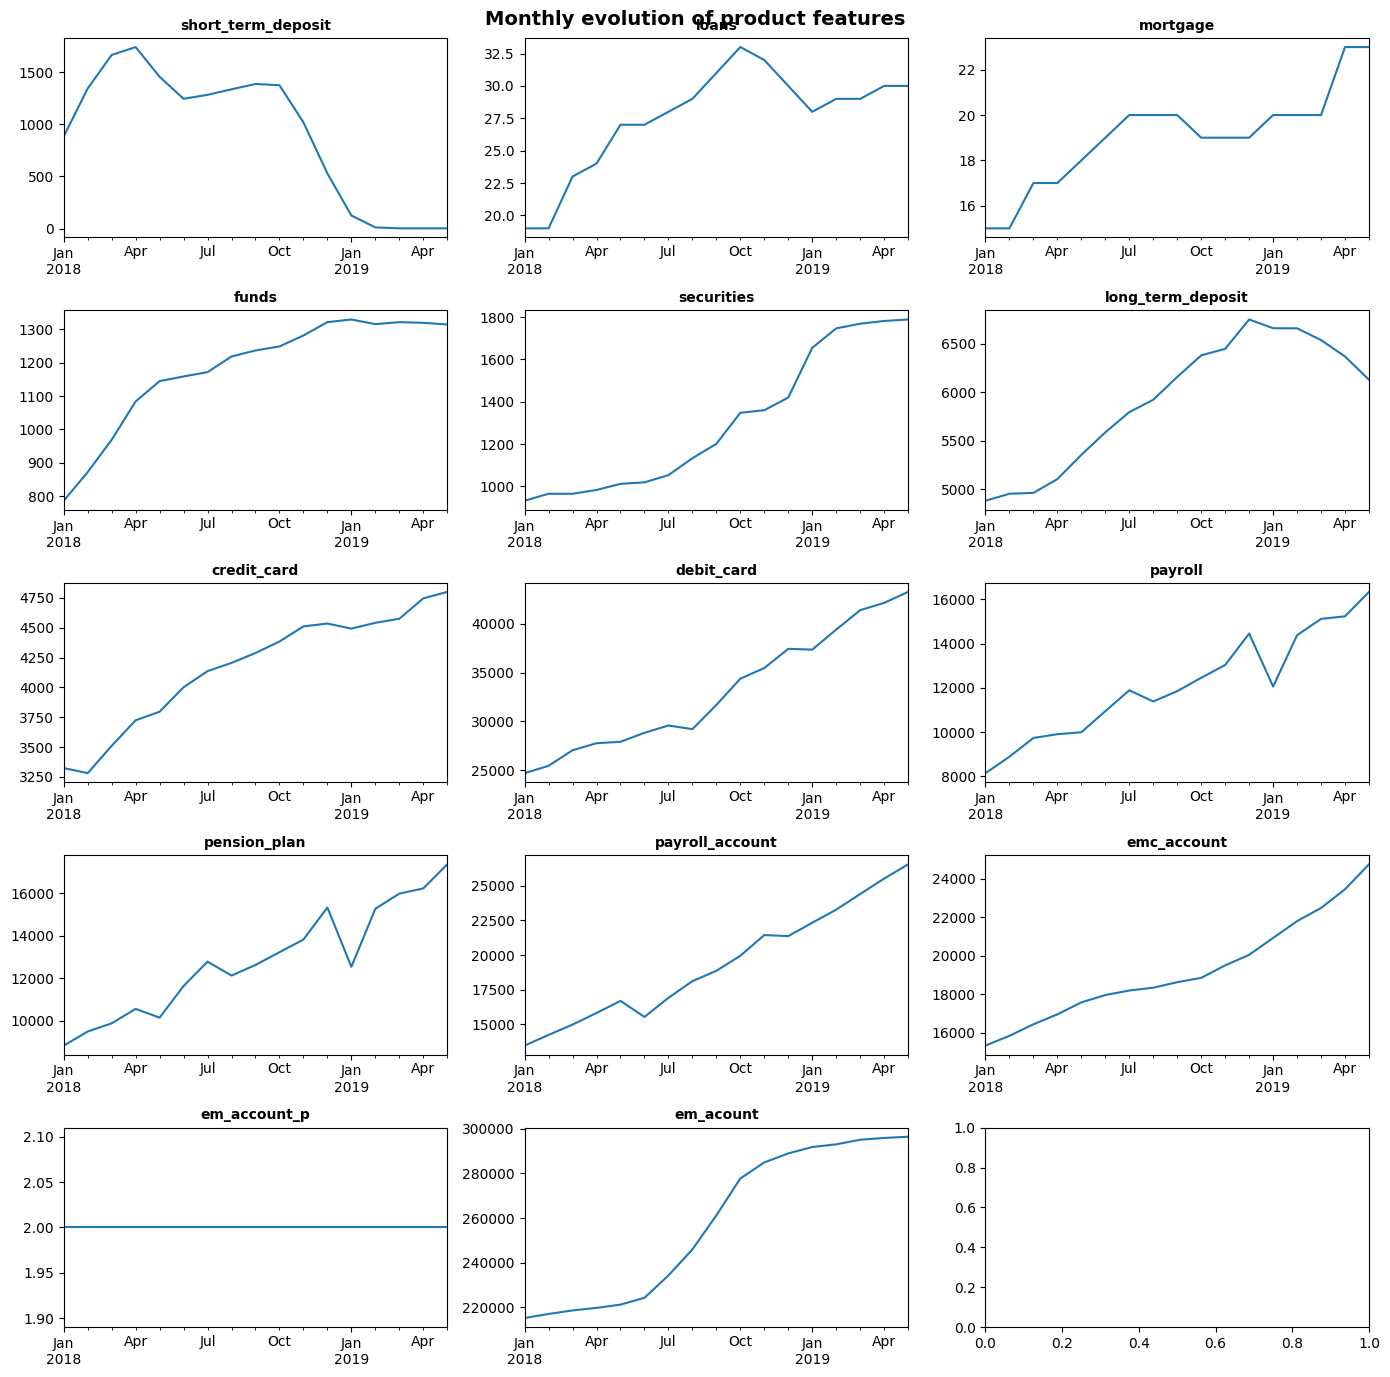

In [ ]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    products_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')

In [ ]:
# only by looking at this graph:
# - the product with worst retention is short term deposit: from all the clients we had in early 2018 we have only two in may 2019
# - the rest have better retentions

In [ ]:
df.loc[(df['short_term_deposit']==1)&(df['pk_partition']=='2019-05-28')]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
5809832,2019-05-28,1090829,1,0,0,0,0,1,0,0,...,2015-10-29,KFC,1.00,02 - PARTICULARES,ES,Sevilla,H,39,N,"134,008.62"
5834085,2019-05-28,1013549,1,0,0,0,0,1,0,1,...,2015-04-25,KAT,1.00,02 - PARTICULARES,ES,Guadalajara,V,62,N,"126,433.47"


In [75]:
df['pk_partition'].min()

'2018-01-28'

In [76]:
check_dates_df = df.loc[df['entry_date']>='2018-01-28'].copy()

In [77]:
check_dates_df.shape

(1202506, 27)

In [79]:
len(check_dates_df['pk_cid'].unique())

151511

In [80]:
check_dates_df.set_index('entry_date', inplace=True)

In [81]:
check_dates_df['pk_partition'].min()

'2018-01-28'

In [83]:
len(check_dates_df.loc[check_dates_df['pk_partition']=='2018-01-28','pk_cid'].unique())

80

In [84]:
check_dates_df.drop_duplicates('pk_cid', inplace=True)

In [87]:
check_dates_df.shape

(151511, 26)

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

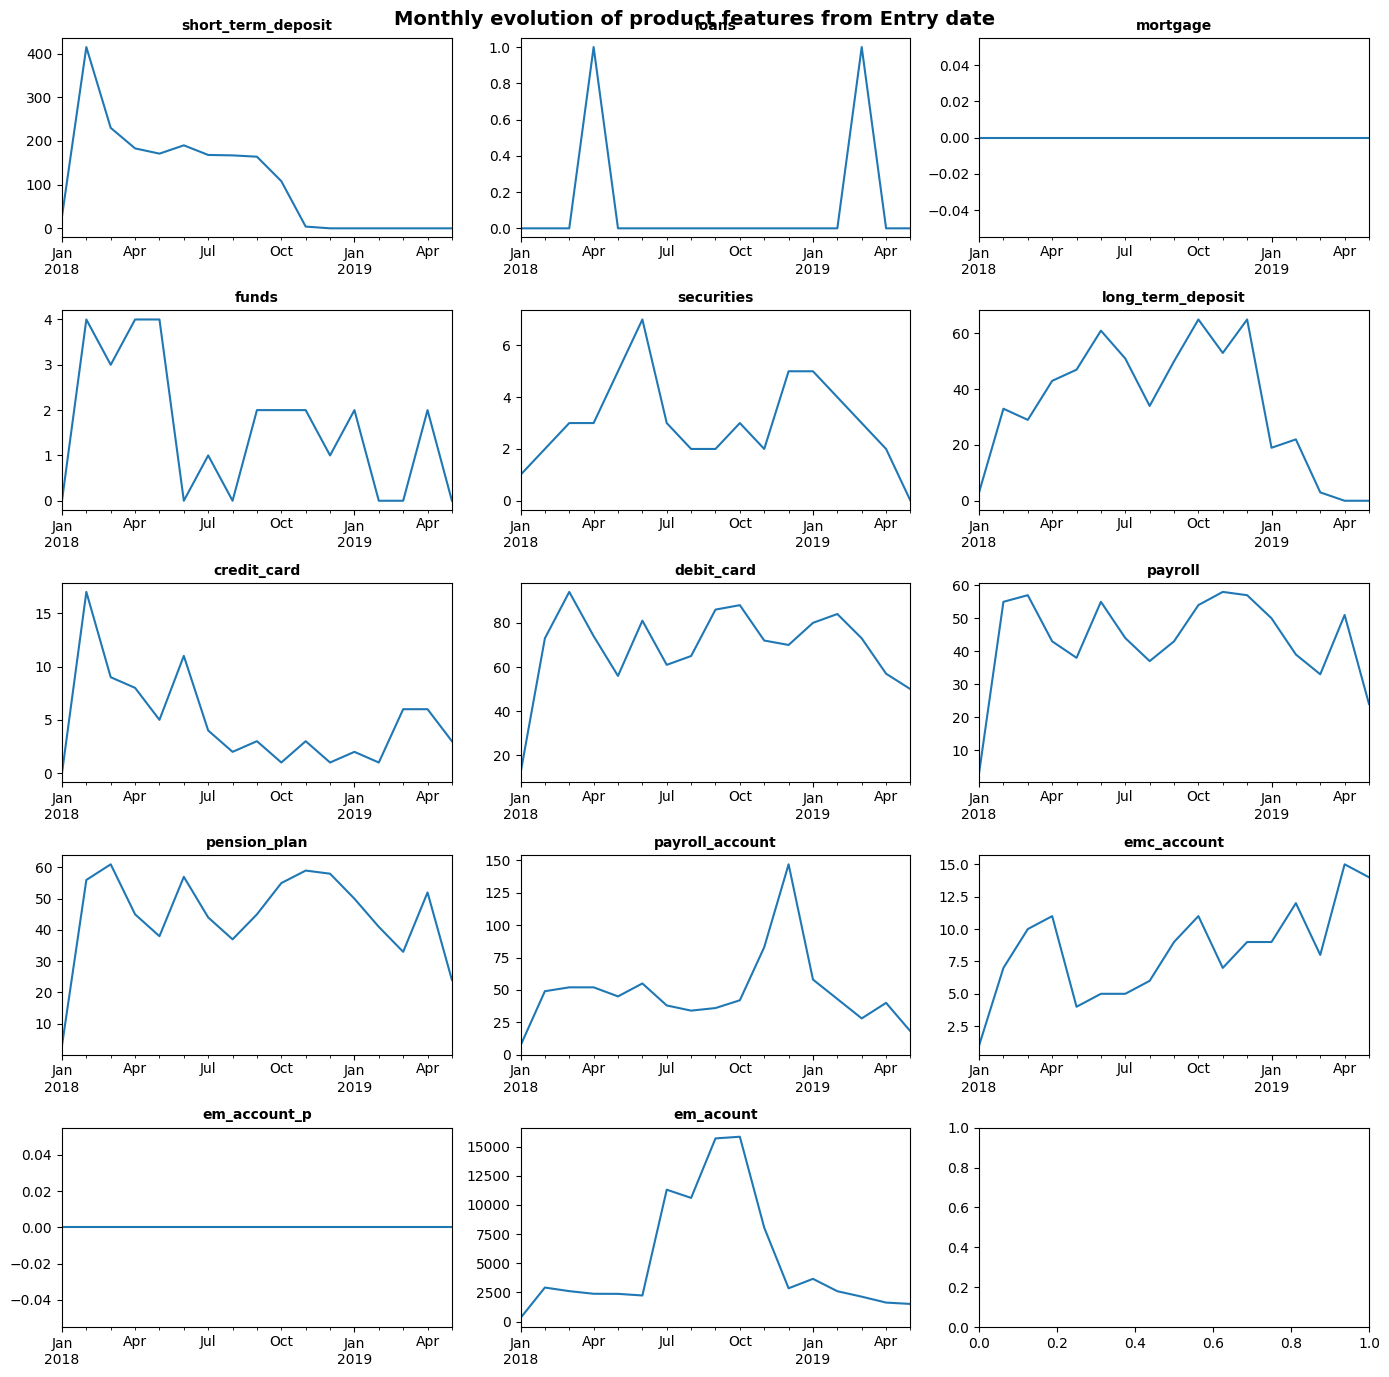

In [86]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    check_dates_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')